# Use the attached dataset, adventurework sales.xlsx, to build three different machine learning models that are to be deployed into our website for optimization.
The dataset has 24 columns and 80 rows, a typical wide, but rather small dataset. Do not worry though, it will serve our purpose!

Task 1: we would like you to model the relationship between the "Order Total" amount and the set of predictors that include "product price", "Product Weight", "Product size", "Order Quantity", "Product Color", "Customer Location" and "Customer Feedback". This task would involve some feature engineering on the non-numerical columns. Kindly review the feature engineering notes and explain clearly what type of feature engineering is important in this case. Moreover, put down the python function that performs the task.

Task 2: Consider the column “Shipping Method”. What would be the appropriate shipping method for a product that is worth $3200, is of size M, originates from Europe, weighs 22 pounds and is destined for a customer in Canada?

Task3: Lastly, consider the column “Product Size”. To what size would you classify the product in Task 2 above?



## Quiz Task 1

# 1.Defining The Problem 

The relationship between the "Order Total" amount and the set of predictors that include "product price", "Product Weight", "Product size", "Order Quantity", "Product Color", "Customer Location" and "Customer Feedback

## Null Hypothesis (H0): There is no significant relationship between the "Order Total" amount and the set of predictors including "product price", "Product Weight", "Product size", "Order Quantity", "Product Color", "Customer Location", and "Customer Feedback".

## Alternative Hypothesis (H1): There is a significant relationship between the "Order Total" amount and at least one of the predictors including "product price", "Product Weight", "Product size", "Order Quantity", "Product Color", "Customer Location", and "Customer Feedback".

#  2.Building A Data Set

Data importation

Data cleaning

Descriptive statistics

Data Transformation/Feature Engineering

Data Visualization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [199]:
df = pd.read_excel(r"C:\Users\USER\Desktop\DATA  SCIENCE\Excel Workbooks Tsi\adventurework sales.xlsx")

In [200]:
df.shape

(80, 25)

In [201]:
df.describe()

,Product ID,Product Price,Product Weight,Product Stock,Order ID,Customer ID,Original Order Date,Order Quantity,Order Total,Shipping Time (in Days),Estimated Delivery Date,Order Date
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80,80.000000,80.000000,80.000000,80,80
mean,1069.300000,1991.875000,26.750000,22.200000,2046.500000,3046.500000,2023-03-18 17:06:00,2.175000,4315.000000,2.837500,2023-04-01 22:30:00,2023-02-16 22:48:00
min,1001.000000,150.000000,9.000000,10.000000,2001.000000,3001.000000,2023-02-01 00:00:00,1.000000,200.000000,1.000000,2023-02-09 00:00:00,2023-01-01 00:00:00
25%,1044.750000,1500.000000,21.000000,18.000000,2022.750000,3022.750000,2023-03-02 18:00:00,1.000000,2200.000000,2.000000,2023-03-22 18:00:00,2023-02-02 18:00:00
50%,1076.500000,2000.000000,27.000000,20.000000,2044.500000,3044.500000,2023-03-17 12:00:00,2.000000,3200.000000,2.000000,2023-04-04 00:00:00,2023-02-17 12:00:00
75%,1096.250000,2400.000000,32.000000,25.000000,2066.250000,3066.250000,2023-04-06 00:00:00,3.000000,5100.000000,4.000000,2023-04-14 06:00:00,2023-03-06 00:00:00
max,1116.000000,3700.000000,42.000000,50.000000,2108.000000,3108.000000,2023-04-28 00:00:00,8.000000,25600.000000,5.000000,2023-04-30 00:00:00,2023-03-28 00:00:00
std,33.746786,739.116979,7.294007,6.943534,31.842174,31.842174,NaN,1.482173,3698.275342,1.496356,NaN,NaN


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product ID               80 non-null     int64         
 1   Product Category         80 non-null     object        
 2   Product Subcategory      80 non-null     object        
 3   Product Name             80 non-null     object        
 4   Product Description      80 non-null     object        
 5   Product Price            80 non-null     int64         
 6   Product Weight           80 non-null     int64         
 7   Product Size             80 non-null     object        
 8   Product Region           80 non-null     object        
 9   Product Color            80 non-null     object        
 10  Product Stock            80 non-null     int64         
 11  Order ID                 80 non-null     int64         
 12  Customer ID              80 non-null  

In [204]:
df['Product Category'].unique()

array(['Mountain Bikes', 'Road Bikes', 'Touring Bikes', 'E-Bikes',
       'Hybrid Bikes', 'Kids Bikes', 'BMX Bikes'], dtype=object)

In [205]:
df['product_category'] = df['Product Category'].map({'Mountain Bikes': 0, 'Road Bikes': 1, 'Touring Bikes': 2, 'E-Bikes': 3,
                                                     'Hybrid Bikes': 4, 'Kids Bikes': 5, 'BMX Bikes': 6})

In [206]:
df['Product Subcategory'].unique()

array(['Cross Country', 'Racing', 'Long Distance', 'Downhill', 'Trail',
       'Touring', 'Adventure', 'Enduro', 'Fat Bikes', 'Cyclocross',
       'Tandem', 'Electric', 'City', 'Gravel', 'Folding', 'Mountain',
       'Commuter', 'Aero', 'Recumbent', 'Balance', 'Freestyle',
       'Endurance'], dtype=object)

In [207]:
df['Product_Subcategory'] = df['Product Category'].map({'Cross Country':1, 'Racing':2, 'Long Distance':3, 'Downhill':4, 'Trail':5,
       'Touring':6, 'Adventure':7, 'Enduro':8, 'Fat Bikes':9, 'Cyclocross':10,
       'Tandem':11, 'Electric':12, 'City':13, 'Gravel':14, 'Folding':15, 'Mountain':16,
       'Commuter':17, 'Aero':18, 'Recumbent':19, 'Balance':20, 'Freestyle':21,
       'Endurance':22})

In [208]:
df['Product Name'].unique()

array(['TrailBlazer 1000', 'TrailBlazer 2000', 'SpeedMaster 1000',
       'SpeedMaster 2000', 'Explorer 1000', 'Explorer 2000',
       'GravityMaster 1000', 'GravityMaster 2000', 'Pathfinder 1000',
       'Pathfinder 2000', 'Voyager 1000', 'Voyager 2000',
       'Adventurer 1000', 'Adventurer 2000', 'EnduroMaster 1000',
       'EnduroMaster 2000', 'FatTrail 1000', 'FatTrail 2000',
       'CrossRider 1000', 'CrossRider 2000', 'DuoExplorer 1000',
       'DuoExplorer 2000', 'E-Mountain 1000', 'E-Mountain 2000',
       'UrbanEco 1000', 'UrbanEco 2000', 'GravelMaster 1000',
       'GravelMaster 2000', 'FoldAway 1000', 'FoldAway 2000',
       'E-TrailBlazer 1000', 'E-TrailBlazer 2000', 'CommutePro 1000',
       'CommutePro 2000', 'AeroSpeed 1000', 'AeroSpeed 2000',
       'ReclineRider 1000', 'ReclineRider 2000', 'DownhillDominator 1000',
       'DownhillDominator 2000', 'LittleBalancer 1000',
       'LittleBalancer 2000', 'FreestyleMaster 1000',
       'FreestyleMaster 2000', 'XC-Rider 1000

In [209]:
df['Name_of_Product'] = df['Product Name'].map({'TrailBlazer 1000':1, 'TrailBlazer 2000':2, 'SpeedMaster 1000':3,
       'SpeedMaster 2000':4, 'Explorer 1000':5, 'Explorer 2000':6,
       'GravityMaster 1000':7, 'GravityMaster 2000':8, 'Pathfinder 1000':9,
       'Pathfinder 2000':10, 'Voyager 1000':11, 'Voyager 2000':12,
       'Adventurer 1000':13, 'Adventurer 2000':14, 'EnduroMaster 1000':15,
       'EnduroMaster 2000':16, 'FatTrail 1000':17, 'FatTrail 2000':18,
       'CrossRider 1000':19, 'CrossRider 2000':20, 'DuoExplorer 1000':21,
       'DuoExplorer 2000':22, 'E-Mountain 1000':23, 'E-Mountain 2000':23,
       'UrbanEco 1000':25, 'UrbanEco 2000':26, 'GravelMaster 1000':27,
       'GravelMaster 2000':28, 'FoldAway 1000':29, 'FoldAway 2000':30,
       'E-TrailBlazer 1000':31, 'E-TrailBlazer 2000':32, 'CommutePro 1000':33,
       'CommutePro 2000':34, 'AeroSpeed 1000':35, 'AeroSpeed 2000':36,
       'ReclineRider 1000':37, 'ReclineRider 2000':38, 'DownhillDominator 1000':39,
       'DownhillDominator 2000':40, 'LittleBalancer 1000':41,
       'LittleBalancer 2000':42, 'FreestyleMaster 1000':43,
       'FreestyleMaster 2000':44, 'XC-Rider 1000':45, 'XC-Rider 2000':46,
       'EnduranceElite 1000':47, 'EnduranceElite 2000':48})

In [210]:
df['Product Description'].unique()

array(['Lightweight and versatile', 'High-performance mountain bike',
       'Agile and aerodynamic road bike', 'Premium racing road bike',
       'Comfortable and durable touring bike', 'Advanced touring bike',
       'Rugged and durable downhill bike',
       'Agile trail bike for all skill levels',
       'High-performance trail bike', 'Comfortable touring road bike',
       'Advanced touring road bike', 'Durable bike for long adventures',
       'Premium adventure touring bike',
       'Endurance-focused mountain bike',
       'High-performance enduro mountain bike', 'All-terrain fat bike',
       'High-performance fat bike', 'Versatile cyclocross bike',
       'Advanced cyclocross bike', 'Comfortable tandem touring bike',
       'High-performance tandem touring bike', 'Electric mountain bike',
       'High-performance electric mountain bike',
       'Eco-friendly electric city bike',
       'High-performance electric city bike', 'All-terrain gravel bike',
       'High-performance 

In [211]:
df['description_of_product'] = df['Product Description'].map({'Lightweight and versatile':0, 'High-performance mountain bike':1,
       'Agile and aerodynamic road bike':2, 'Premium racing road bike':3,
       'Comfortable and durable touring bike':4, 'Advanced touring bike':5,
       'Rugged and durable downhill bike':6,
       'Agile trail bike for all skill levels':7,
       'High-performance trail bike':8, 'Comfortable touring road bike':9,
       'Advanced touring road bike':10, 'Durable bike for long adventures':11,
       'Premium adventure touring bike':12,
       'Endurance-focused mountain bike':13,
       'High-performance enduro mountain bike':14, 'All-terrain fat bike':15,
       'High-performance fat bike':16, 'Versatile cyclocross bike':17,
       'Advanced cyclocross bike':18, 'Comfortable tandem touring bike':19,
       'High-performance tandem touring bike':20, 'Electric mountain bike':21,
       'High-performance electric mountain bike':22,
       'Eco-friendly electric city bike':23,
       'High-performance electric city bike':24, 'All-terrain gravel bike':25,
       'High-performance gravel bike':26, 'Compact folding touring bike':27,
       'Advanced folding touring bike':28, 'Efficient commuter hybrid bike':29,
       'High-performance commuter hybrid bike':30, 'Aerodynamic road bike':31,
       'Advanced aerodynamic road bike':32,
       'Comfortable recumbent touring bike':33,
       'High-performance recumbent touring bike':34,
       'Downhill mountain bike':35,
       'High-performance downhill mountain bike':36,
       'Starter balance bike for kids':37, 'Upgraded balance bike for kids':38,
       'Beginner freestyle BMX bike':39, 'Advanced freestyle BMX bike':40,
       'Cross country mountain bike':41,
       'High-performance cross country bike':42, 'Endurance road bike':43,
       'High-performance endurance road bike':44})

In [214]:
df['Product Size'].unique()

array(['M', 'L'], dtype=object)

In [215]:
df['size_of_product'] = df['Product Size'].map({'M':0, 'L':1})

In [216]:
df['Product Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [217]:
df['product_region'] = df['Product Region'].map({'North America':0, 'Europe':1, 'Asia':2})

In [218]:
df['Product Color'].unique()

array(['Red', 'Blue', 'Yellow', 'Black', 'Green', 'Orange', 'White',
       'Silver'], dtype=object)

In [220]:
df['colour_of_product'] = df['Product Color'].map({'Red':0, 'Blue':1, 'Yellow':2, 'Black':3, 'Green':4, 'Orange':5, 'White':6,
       'Silver':7})

In [221]:
df['Customer Name'].unique()

array(['John Doe', 'Jane Smith', 'Jack Williams', 'Mary Johnson',
       'Robert Brown', 'Emily Taylor', 'David Miller', 'Sarah Wilson',
       'James Moore', 'Lily Smith', 'William Brown', 'Emma Jones',
       'Jack Davis', 'Sophia Williams', 'Michael Johnson',
       'Olivia Wilson', 'Ethan Taylor', 'Ava Thomas', 'Isabella Jackson',
       'Amelia Anderson', 'Liam Carter', 'Sophia Davis',
       'Benjamin Williams', 'Mia Wilson', 'Noah Johnson',
       'Harper Thompson', 'Ava Martinez', 'Isabella Smith', 'Liam Davis',
       'Mia Jackson', 'Ava Wilson', 'Sophia Taylor', 'Benjamin Thompson',
       'Harper Martinez', 'Ethan Smith', 'Isabella Davis', 'Liam Johnson',
       'Noah Taylor', 'Sophia Thompson', 'Benjamin Martinez',
       'Harper Smith', 'Ethan Davis'], dtype=object)

In [222]:
df['name_of_customer'] = df['Customer Name'].map({'John Doe':0, 'Jane Smith':1, 'Jack Williams':2, 'Mary Johnson':3,
       'Robert Brown':4, 'Emily Taylor':5, 'David Miller':6, 'Sarah Wilson':7,
       'James Moore':8, 'Lily Smith':9, 'William Brown':10, 'Emma Jones':11,
       'Jack Davis':12, 'Sophia Williams':13, 'Michael Johnson':14,
       'Olivia Wilson':15, 'Ethan Taylor':16, 'Ava Thomas':17, 'Isabella Jackson':18,
       'Amelia Anderson':19, 'Liam Carter':20, 'Sophia Davis':21,
       'Benjamin Williams':22, 'Mia Wilson':23, 'Noah Johnson':24,
       'Harper Thompson':25, 'Ava Martinez':26, 'Isabella Smith':27, 'Liam Davis':28,
       'Mia Jackson':29, 'Ava Wilson':30, 'Sophia Taylor':31, 'Benjamin Thompson':32,
       'Harper Martinez':33, 'Ethan Smith':34, 'Isabella Davis':35, 'Liam Johnson':36,
       'Noah Taylor':37, 'Sophia Thompson':38, 'Benjamin Martinez':39,
       'Harper Smith':40, 'Ethan Davis':41})

In [223]:
df['Customer Location'].unique()

array([' USA', ' UK', ' Japan', ' Germany', ' Spain', ' China', ' France',
       ' Italy', ' South Korea', ' Greece', ' India', ' Ireland',
       ' Taiwan', ' Canada', ' England', ' Poland', ' Portugal',
       ' Netherlands', ' Australia'], dtype=object)

In [224]:
df['location_of_customer'] = df['Customer Location'].map({' USA':0, ' UK':1, ' Japan':2, ' Germany':3, ' Spain':4, ' China':5, ' France':6,
       ' Italy':7, ' South Korea':8, ' Greece':9, ' India':10, ' Ireland':11,
       ' Taiwan':12, ' Canada':13, ' England':14, ' Poland':15, ' Portugal':16,
       ' Netherlands':17, ' Australia':18})

In [225]:
df['Original Order Date'].unique()

<DatetimeArray>
['2023-04-01 00:00:00', '2023-04-02 00:00:00', '2023-04-03 00:00:00',
 '2023-04-04 00:00:00', '2023-04-05 00:00:00', '2023-04-06 00:00:00',
 '2023-04-07 00:00:00', '2023-04-08 00:00:00', '2023-04-21 00:00:00',
 '2023-04-22 00:00:00', '2023-04-24 00:00:00', '2023-04-25 00:00:00',
 '2023-04-26 00:00:00', '2023-04-27 00:00:00', '2023-04-28 00:00:00',
 '2023-04-11 00:00:00', '2023-04-12 00:00:00', '2023-04-14 00:00:00',
 '2023-04-13 00:00:00', '2023-04-15 00:00:00', '2023-04-16 00:00:00',
 '2023-04-17 00:00:00', '2023-04-18 00:00:00', '2023-03-08 00:00:00',
 '2023-03-01 00:00:00', '2023-03-02 00:00:00', '2023-03-03 00:00:00',
 '2023-03-04 00:00:00', '2023-03-05 00:00:00', '2023-03-06 00:00:00',
 '2023-03-07 00:00:00', '2023-03-21 00:00:00', '2023-03-22 00:00:00',
 '2023-03-23 00:00:00', '2023-03-24 00:00:00', '2023-03-25 00:00:00',
 '2023-03-26 00:00:00', '2023-03-27 00:00:00', '2023-03-28 00:00:00',
 '2023-03-11 00:00:00', '2023-03-12 00:00:00', '2023-03-13 00:00:00',
 '20

In [226]:

df['date_of_order'] = df['Original Order Date'].astype('int64')

In [227]:
df['Payment Method'].unique()

array(['Credit Card', 'PayPal'], dtype=object)

In [228]:
df['method_of_payment'] = df['Payment Method'].map({'Credit Card':0,'PayPal':1})

In [229]:
df['Shipping Method'].unique()

array(['Ground', 'Air'], dtype=object)

In [230]:
df['method_of_shipping'] = df['Shipping Method'].map({'Ground':0, 'Air':1})

In [231]:
df['Estimated Delivery Date'] = df['Estimated Delivery Date'].astype('int64')

In [232]:
df['Customer Feedback'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [233]:
df['customer_feedback'] = df['Customer Feedback'].map({'Positive':0, 'Neutral':1, 'Negative':2})

In [234]:
df['Order Status'].unique()

array(['Shipped', 'Processing', 'Cancelled'], dtype=object)

In [235]:
df['status_order'] = df['Order Status'].map({'Shipped':0, 'Processing':1, 'Cancelled':2})

In [237]:
df['Original Order Date'].unique()

<DatetimeArray>
['2023-04-01 00:00:00', '2023-04-02 00:00:00', '2023-04-03 00:00:00',
 '2023-04-04 00:00:00', '2023-04-05 00:00:00', '2023-04-06 00:00:00',
 '2023-04-07 00:00:00', '2023-04-08 00:00:00', '2023-04-21 00:00:00',
 '2023-04-22 00:00:00', '2023-04-24 00:00:00', '2023-04-25 00:00:00',
 '2023-04-26 00:00:00', '2023-04-27 00:00:00', '2023-04-28 00:00:00',
 '2023-04-11 00:00:00', '2023-04-12 00:00:00', '2023-04-14 00:00:00',
 '2023-04-13 00:00:00', '2023-04-15 00:00:00', '2023-04-16 00:00:00',
 '2023-04-17 00:00:00', '2023-04-18 00:00:00', '2023-03-08 00:00:00',
 '2023-03-01 00:00:00', '2023-03-02 00:00:00', '2023-03-03 00:00:00',
 '2023-03-04 00:00:00', '2023-03-05 00:00:00', '2023-03-06 00:00:00',
 '2023-03-07 00:00:00', '2023-03-21 00:00:00', '2023-03-22 00:00:00',
 '2023-03-23 00:00:00', '2023-03-24 00:00:00', '2023-03-25 00:00:00',
 '2023-03-26 00:00:00', '2023-03-27 00:00:00', '2023-03-28 00:00:00',
 '2023-03-11 00:00:00', '2023-03-12 00:00:00', '2023-03-13 00:00:00',
 '20

In [238]:
df['original_order_date'] = df['order_date'] = df['Original Order Date'].astype('int64')


In [239]:
columns_to_drop = ['Product Category', 'Product Subcategory','Original Order Date','Order Date','Product Name','Original Order Date','Order Date','Product Description', 'Product Size', 'Product Region', 'Product Color', 'Customer Name', 'Customer Location', 'Order Status', 'Payment Method', 'Shipping Method', 'Customer Feedback']

# Dropping the specified columns
df = df.drop(columns=columns_to_drop)

In [265]:
df.head(10)

,Product ID,Product Price,Product Weight,Product Stock,Order ID,Customer ID,Order Quantity,Order Total,Shipping Time (in Days),Estimated Delivery Date,...,colour_of_product,name_of_customer,location_of_customer,date_of_order,method_of_payment,method_of_shipping,customer_feedback,status_order,original_order_date,order_date
0,1001,1200,25,40,2001,3001,4,4800,3,1680566400000000000,...,0,0,0,1680307200000000000,0,0,0,0,1680307200000000000,1680307200000000000
1,1002,1500,22,34,2002,3002,2,3000,2,1680480000000000000,...,1,1,1,1680393600000000000,1,1,1,1,1680393600000000000,1680393600000000000
2,1003,1800,18,27,2003,3003,1,1800,5,1680825600000000000,...,2,2,2,1680480000000000000,0,0,0,2,1680480000000000000,1680480000000000000
3,1004,2100,16,30,2004,3004,2,4200,1,1680566400000000000,...,3,3,0,1680566400000000000,0,1,2,0,1680566400000000000,1680566400000000000
4,1005,1300,27,25,2005,3005,1,1300,4,1680912000000000000,...,4,4,3,1680652800000000000,1,0,0,1,1680652800000000000,1680652800000000000
5,1006,1600,24,12,2006,3006,3,4800,2,1680825600000000000,...,0,5,4,1680739200000000000,0,1,0,0,1680739200000000000,1680739200000000000
6,1007,2200,29,12,2007,3007,2,4400,5,1681171200000000000,...,5,6,5,1680825600000000000,1,0,2,0,1680825600000000000,1680825600000000000
7,1008,2500,27,20,2008,3008,4,10000,1,1680912000000000000,...,6,7,0,1680912000000000000,0,1,0,1,1680912000000000000,1680912000000000000
8,1021,1100,24,21,2021,3021,5,5500,4,1681257600000000000,...,1,8,6,1682035200000000000,0,0,1,0,1682035200000000000,1682035200000000000
9,1022,1400,21,18,2022,3022,1,1400,2,1681430400000000000,...,0,9,3,1682121600000000000,1,1,0,1,1682121600000000000,1682121600000000000


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               80 non-null     int64  
 1   Product Price            80 non-null     int64  
 2   Product Weight           80 non-null     int64  
 3   Product Stock            80 non-null     int64  
 4   Order ID                 80 non-null     int64  
 5   Customer ID              80 non-null     int64  
 6   Order Quantity           80 non-null     int64  
 7   Order Total              80 non-null     int64  
 8   Shipping Time (in Days)  80 non-null     int64  
 9   Estimated Delivery Date  80 non-null     int64  
 10  product_category         80 non-null     int64  
 11  Product_Subcategory      0 non-null      float64
 12  Name_of_Product          80 non-null     int64  
 13  description_of_product   80 non-null     int64  
 14  size_of_product          80 

In [241]:
df.columns

Index(['Product ID', 'Product Price', 'Product Weight', 'Product Stock',
       'Order ID', 'Customer ID', 'Order Quantity', 'Order Total',
       'Shipping Time (in Days)', 'Estimated Delivery Date',
       'product_category', 'Product_Subcategory', 'Name_of_Product',
       'description_of_product', 'size_of_product', 'product_region',
       'colour_of_product', 'name_of_customer', 'location_of_customer',
       'date_of_order', 'method_of_payment', 'method_of_shipping',
       'customer_feedback', 'status_order', 'original_order_date',
       'order_date'],
      dtype='object')

In [243]:
df.isnull().sum()

Product ID                  0
Product Price               0
Product Weight              0
Product Stock               0
Order ID                    0
Customer ID                 0
Order Quantity              0
Order Total                 0
Shipping Time (in Days)     0
Estimated Delivery Date     0
product_category            0
Product_Subcategory        80
Name_of_Product             0
description_of_product      0
size_of_product             0
product_region              0
colour_of_product           0
name_of_customer            0
location_of_customer        0
date_of_order               0
method_of_payment           0
method_of_shipping          0
customer_feedback           0
status_order                0
original_order_date         0
order_date                  0
dtype: int64

In [244]:
df['Product_Subcategory'].fillna(0,inplace=True)

In [245]:
df.isnull().sum()

Product ID                 0
Product Price              0
Product Weight             0
Product Stock              0
Order ID                   0
Customer ID                0
Order Quantity             0
Order Total                0
Shipping Time (in Days)    0
Estimated Delivery Date    0
product_category           0
Product_Subcategory        0
Name_of_Product            0
description_of_product     0
size_of_product            0
product_region             0
colour_of_product          0
name_of_customer           0
location_of_customer       0
date_of_order              0
method_of_payment          0
method_of_shipping         0
customer_feedback          0
status_order               0
original_order_date        0
order_date                 0
dtype: int64

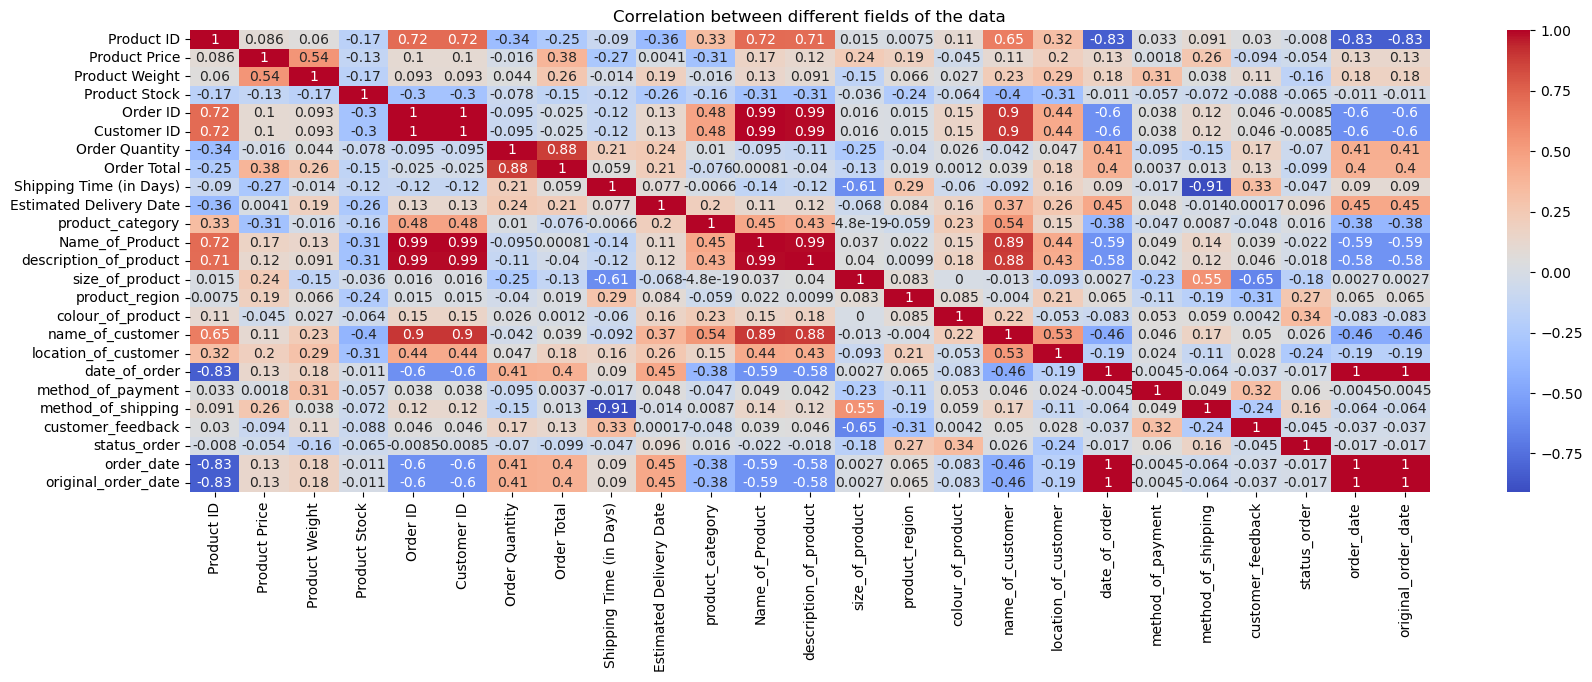

In [247]:
corr_matrix1 = df[['Product ID', 'Product Price', 'Product Weight', 'Product Stock',
       'Order ID', 'Customer ID', 'Order Quantity', 'Order Total',
       'Shipping Time (in Days)', 'Estimated Delivery Date',
       'product_category', 'Name_of_Product', 'description_of_product',
       'size_of_product', 'product_region', 'colour_of_product',
       'name_of_customer', 'location_of_customer', 'date_of_order',
       'method_of_payment', 'method_of_shipping', 'customer_feedback',
       'status_order', 'order_date', 'original_order_date']].corr()

plt.figure(figsize=(20, 6))  # corrected this line
corr_viz1 = sns.heatmap(corr_matrix1, annot=True, cmap="coolwarm")
plt.title("Correlation between different fields of the data")
plt.show()

# Training Data Set

Splitting data 80%(train) - 20%(test) rule

Train the train dataset using relevant machine learning libraries

Fit the model

Print the summary

In [267]:
print(df.columns)

Index(['Product ID', 'Product Price', 'Product Weight', 'Product Stock',
       'Order ID', 'Customer ID', 'Order Quantity', 'Order Total',
       'Shipping Time (in Days)', 'Estimated Delivery Date',
       'product_category', 'Product_Subcategory', 'Name_of_Product',
       'description_of_product', 'size_of_product', 'product_region',
       'colour_of_product', 'name_of_customer', 'location_of_customer',
       'date_of_order', 'method_of_payment', 'method_of_shipping',
       'customer_feedback', 'status_order', 'original_order_date',
       'order_date'],
      dtype='object')


In [268]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame containing the data

# Selecting predictors and target variable
X = df[['Product Price', 'Product Weight', 'size_of_product', 'Order Quantity','colour_of_product', 'location_of_customer', 'customer_feedback']]
y = df['Order Total']

# Encode categorical variables if needed
# X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant to the predictors
#X_train = sm.add_constant(X_train)

# Initialize and fit the model
model = sm.OLS(y_train, X_train)
result = model.fit()

# Print the summary
print(result.summary())


                                 OLS Regression Results                                
Dep. Variable:            Order Total   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              212.7
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                    1.95e-38
Time:                        13:51:19   Log-Likelihood:                         -531.73
No. Observations:                  64   AIC:                                      1077.
Df Residuals:                      57   BIC:                                      1093.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

# Evaluating The Model

In [280]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions
try:
    y_pred = model.predict(X_test)
except Exception as e:
    print("Error predicting:", e)

# Evaluating the model
try:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
except Exception as e:
    print("Error evaluating the model:", e)


Error predicting: shapes (64,7) and (16,7) not aligned: 7 (dim 1) != 16 (dim 0)
Mean Squared Error: 4397618.792758742
R-squared: 0.8617725857333755


## Given that the p-value (Prob (F-statistic))is extremely small (1.95e-38), much less than a typical significance level of 0.05, we would reject the null hypothesis. 
## This suggests that at least one of the independent variables in the model has a significant effect on the dependent variable.

# Use the Model

## Quiz Task 2

In [172]:
def determine_shipping_method(price, size, origin, weight, destination):
    if price >= 3000:
        return "Air"
    elif size == "M":
        if origin == "Europe":
            if weight <= 20:
                if destination == "Canada":
                    return "Ground"
                else:
                    return "Air"
            else:
                return "Air"
        else:
            return "Air"
    else:
        return "Ground"

# Test the function with the given information
shipping_method = determine_shipping_method(price=3200, size="M", origin="Europe", weight=22, destination="Canada")
print("Appropriate Shipping Method:", shipping_method)

Appropriate Shipping Method: Air


## Quiz Task 3

In Task 2, the product size is given as "M". So, the product would be classified as size "M"

Also on Filtering on Excel using the criteria ;

1.It is worth $3200, 
2.It is of size M
3.Originates from Europe
4.Weighs 22 pounds
